<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E8%BC%95%E6%B2%B9%E6%A1%88%E5%AD%90ART2%E5%88%86%E7%BE%A4_201909012_%E7%89%B9%E5%BE%B5%E5%B7%A5%E7%A8%8B_%E5%BA%8F%E5%88%97%E9%81%9E%E5%A2%9E%E9%A0%90%E6%B8%AC_%E8%B6%85%E5%8F%83%E6%95%B8%E8%AA%BF%E6%95%B4(10%E6%AC%A1)_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import ART2_Ricky
import pandas as pd
import numpy as np

In [3]:
#載入訓練資料
path = '/content/drive/My Drive/台塑輕油案子/輕油實驗數據(保留大部份欄位,三個基本規則清洗過).csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(4521, 41)


,IBP,T10,T30,T50,T70,T90,T95,EBP,Total Paraffins,Total Naphthenes,Total Aromatics,C6- in Feed,C7 in Naphtha Feed,C8 in Naphtha Feed,C9 in Naphtha Feed,C10+ in Naphtha Feed,N+A in Feed,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A,Total
0,87.9,100.5,109.2,119.2,131.2,146.5,153.1,162.8,67.815,19.214,12.764,11.639,27.793,28.970,24.415,6.976,31.978,0.272,0.132,0.059,5.293,2.570,2.819,0.494,10.395,8.070,6.411,2.917,9.138,9.649,4.810,5.373,6.405,9.759,4.590,3.661,0.875,5.257,0.525,0.319,99.793
1,87.3,99.6,108.9,117.9,130.1,145.5,151.6,164.2,67.313,19.434,12.134,11.433,27.321,28.714,23.519,7.894,31.568,0.297,0.151,0.062,5.089,2.531,2.804,0.499,10.074,7.958,6.395,2.894,8.970,9.548,4.753,5.443,6.324,9.899,4.301,2.995,0.881,5.591,1.119,0.303,98.881
2,88.7,100.0,109.1,118.8,130.7,145.6,152.0,164.0,67.494,19.226,12.118,11.390,27.250,28.843,23.596,7.759,31.344,0.262,0.126,0.061,5.107,2.571,2.771,0.492,10.069,7.913,6.378,2.890,9.006,9.591,4.778,5.468,6.360,9.983,4.274,2.979,0.865,5.641,0.964,0.289,98.838
3,88.6,100.4,109.1,118.6,129.4,142.9,147.2,159.4,67.354,19.363,12.090,10.899,26.942,29.240,24.010,7.716,31.453,0.224,0.105,0.060,4.894,2.497,2.650,0.469,10.015,7.685,6.376,2.866,9.133,9.708,4.889,5.510,6.444,10.182,4.420,2.964,0.830,5.637,0.968,0.281,98.807
4,88.4,100.4,108.8,118.1,129.0,142.2,146.5,158.0,66.593,19.321,12.869,11.042,27.089,29.132,24.603,6.917,32.190,0.243,0.117,0.061,4.946,2.503,2.695,0.477,10.053,7.765,6.394,2.877,9.101,9.676,4.855,5.500,6.416,10.115,4.347,3.725,0.835,4.823,0.969,0.290,98.783


In [4]:
x_columns = ['T10','T50','T90','N+A in Feed']
y_columns = ['C5NP', 'C5IP', 'C5N', 'C6NP',
       'C6IP', 'C6N', 'C6A', 'C7NP', 'C7IP', 'C7N', 'C7A', 'C8NP', 'C8IP',
       'C8N', 'C8A', 'C9NP', 'C9IP', 'C9N', 'C9A', 'C10NP', 'C10IP', 'C10N',
       'C10A']
df = df[x_columns+y_columns]
df.head()

,T10,T50,T90,N+A in Feed,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
0,100.5,119.2,146.5,31.978,0.272,0.132,0.059,5.293,2.570,2.819,0.494,10.395,8.070,6.411,2.917,9.138,9.649,4.810,5.373,6.405,9.759,4.590,3.661,0.875,5.257,0.525,0.319
1,99.6,117.9,145.5,31.568,0.297,0.151,0.062,5.089,2.531,2.804,0.499,10.074,7.958,6.395,2.894,8.970,9.548,4.753,5.443,6.324,9.899,4.301,2.995,0.881,5.591,1.119,0.303
2,100.0,118.8,145.6,31.344,0.262,0.126,0.061,5.107,2.571,2.771,0.492,10.069,7.913,6.378,2.890,9.006,9.591,4.778,5.468,6.360,9.983,4.274,2.979,0.865,5.641,0.964,0.289
3,100.4,118.6,142.9,31.453,0.224,0.105,0.060,4.894,2.497,2.650,0.469,10.015,7.685,6.376,2.866,9.133,9.708,4.889,5.510,6.444,10.182,4.420,2.964,0.830,5.637,0.968,0.281
4,100.4,118.1,142.2,32.190,0.243,0.117,0.061,4.946,2.503,2.695,0.477,10.053,7.765,6.394,2.877,9.101,9.676,4.855,5.500,6.416,10.115,4.347,3.725,0.835,4.823,0.969,0.290


In [5]:
df = df.rename(columns={'N+A in Feed':'NA'})
df.head()

,T10,T50,T90,NA,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
0,100.5,119.2,146.5,31.978,0.272,0.132,0.059,5.293,2.570,2.819,0.494,10.395,8.070,6.411,2.917,9.138,9.649,4.810,5.373,6.405,9.759,4.590,3.661,0.875,5.257,0.525,0.319
1,99.6,117.9,145.5,31.568,0.297,0.151,0.062,5.089,2.531,2.804,0.499,10.074,7.958,6.395,2.894,8.970,9.548,4.753,5.443,6.324,9.899,4.301,2.995,0.881,5.591,1.119,0.303
2,100.0,118.8,145.6,31.344,0.262,0.126,0.061,5.107,2.571,2.771,0.492,10.069,7.913,6.378,2.890,9.006,9.591,4.778,5.468,6.360,9.983,4.274,2.979,0.865,5.641,0.964,0.289
3,100.4,118.6,142.9,31.453,0.224,0.105,0.060,4.894,2.497,2.650,0.469,10.015,7.685,6.376,2.866,9.133,9.708,4.889,5.510,6.444,10.182,4.420,2.964,0.830,5.637,0.968,0.281
4,100.4,118.1,142.2,32.190,0.243,0.117,0.061,4.946,2.503,2.695,0.477,10.053,7.765,6.394,2.877,9.101,9.676,4.855,5.500,6.416,10.115,4.347,3.725,0.835,4.823,0.969,0.290


In [6]:
y_columns = df.columns[4:27].tolist()
x_columns = df.drop(y_columns,axis=1).columns.tolist()
print(x_columns)
print(y_columns)

['T10', 'T50', 'T90', 'NA']
['C5NP', 'C5IP', 'C5N', 'C6NP', 'C6IP', 'C6N', 'C6A', 'C7NP', 'C7IP', 'C7N', 'C7A', 'C8NP', 'C8IP', 'C8N', 'C8A', 'C9NP', 'C9IP', 'C9N', 'C9A', 'C10NP', 'C10IP', 'C10N', 'C10A']


# ART2針對 T10,T50,T90,NA做分群

In [7]:
ART2 = ART2_Ricky.ART2(rho=0.97)
labels = ART2.fit_transform(X=df[x_columns])
df['cluster']=labels
df['cluster'].unique()

array([0.])

# 全部都當成一群.....以下降維後再分分看

In [8]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

#原始特徵
X = df[x_columns]

#特徵縮放
scaler = StandardScaler()
scaler.fit(X)#fit
X_ss = scaler.transform(X)#transform

#ISOMAP降維
iso = Isomap(n_components=3)
iso_features = iso.fit_transform(X_ss)

#整理成DataFrame方便觀看
iso_3features = pd.DataFrame(iso_features,columns=['iso_1','iso_2','iso_3'])
iso_3features.head()

,iso_1,iso_2,iso_3
0,-1.532544,1.070935,-0.013678
1,-1.434140,1.070788,0.367358
2,-1.590134,1.107424,0.259273
3,-1.163833,0.833576,0.880827
4,-0.965729,0.664349,0.986232


In [9]:
ART2 = ART2_Ricky.ART2(rho=0.96)
labels = ART2.fit_transform(X=iso_3features)
df['cluster']=labels
df['cluster'].value_counts()

3.0    1550
0.0    1168
1.0     923
2.0     498
4.0     382
Name: cluster, dtype: int64

In [10]:
df['iso_1'] = iso_3features['iso_1']
df['iso_2'] = iso_3features['iso_2']
df['iso_3'] = iso_3features['iso_3']
df.head()

,T10,T50,T90,NA,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A,cluster,iso_1,iso_2,iso_3
0,100.5,119.2,146.5,31.978,0.272,0.132,0.059,5.293,2.570,2.819,0.494,10.395,8.070,6.411,2.917,9.138,9.649,4.810,5.373,6.405,9.759,4.590,3.661,0.875,5.257,0.525,0.319,0.0,-1.532544,1.070935,-0.013678
1,99.6,117.9,145.5,31.568,0.297,0.151,0.062,5.089,2.531,2.804,0.499,10.074,7.958,6.395,2.894,8.970,9.548,4.753,5.443,6.324,9.899,4.301,2.995,0.881,5.591,1.119,0.303,0.0,-1.434140,1.070788,0.367358
2,100.0,118.8,145.6,31.344,0.262,0.126,0.061,5.107,2.571,2.771,0.492,10.069,7.913,6.378,2.890,9.006,9.591,4.778,5.468,6.360,9.983,4.274,2.979,0.865,5.641,0.964,0.289,0.0,-1.590134,1.107424,0.259273
3,100.4,118.6,142.9,31.453,0.224,0.105,0.060,4.894,2.497,2.650,0.469,10.015,7.685,6.376,2.866,9.133,9.708,4.889,5.510,6.444,10.182,4.420,2.964,0.830,5.637,0.968,0.281,1.0,-1.163833,0.833576,0.880827
4,100.4,118.1,142.2,32.190,0.243,0.117,0.061,4.946,2.503,2.695,0.477,10.053,7.765,6.394,2.877,9.101,9.676,4.855,5.500,6.416,10.115,4.347,3.725,0.835,4.823,0.969,0.290,1.0,-0.965729,0.664349,0.986232


# 分群結果可視化

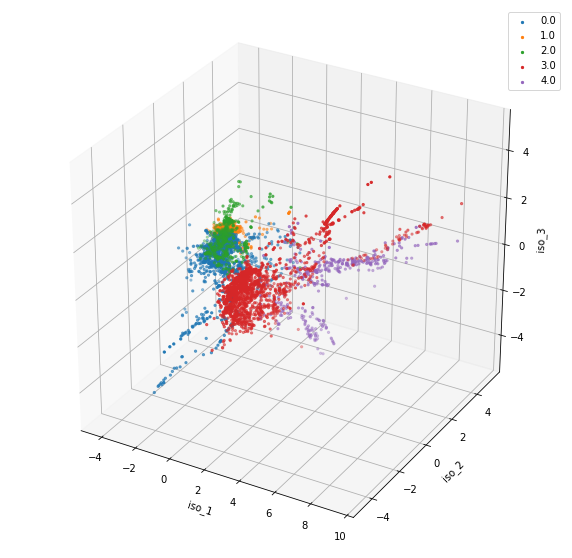

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('iso_1')
ax.set_ylabel('iso_2')
ax.set_zlabel('iso_3')

for i in sorted(df['cluster'].unique()):
  data = df[df['cluster']==i]
  ax.scatter(data['iso_1'],data['iso_2'],data['iso_3'], marker='.',label=str(i))
plt.legend()
plt.show()

# ART2不同警戒值對應的群數

In [0]:
#from tqdm import tqdm
#logs = {}
#for rho in tqdm(np.arange(0.95,0.99,0.005)):
#  ART2 = ART2_Ricky.ART2(rho=rho)
#  labels = ART2.fit_transform(X=iso_3features)
#  df['cluster']=labels
#  logs[rho] = len(df['cluster'].unique())
#plt.plot(logs.keys(),logs.values())
#plt.title('rho with cluster num:')
#plt.show()

# ART2權重

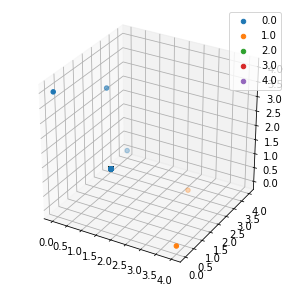

In [13]:
df['w1'] = ART2.WF1_F2[:,0]
df['w2'] = ART2.WF1_F2[:,1]
df['w3'] = ART2.WF1_F2[:,2]

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for i in sorted(df['cluster'].unique()):
  data = df[df['cluster']==i]
  ax.scatter(data['w1'],data['w2'],data['w3'], marker='o',label=str(i))
plt.legend()
plt.show()

In [14]:
df = df.drop(['w1','w2','w3'],axis=1)
df.columns

Index(['T10', 'T50', 'T90', 'NA', 'C5NP', 'C5IP', 'C5N', 'C6NP', 'C6IP', 'C6N',
       'C6A', 'C7NP', 'C7IP', 'C7N', 'C7A', 'C8NP', 'C8IP', 'C8N', 'C8A',
       'C9NP', 'C9IP', 'C9N', 'C9A', 'C10NP', 'C10IP', 'C10N', 'C10A',
       'cluster', 'iso_1', 'iso_2', 'iso_3'],
      dtype='object')

# 針對各群分別建立Model

In [15]:
#Modeling工具
from sklearn.base import TransformerMixin

class ModelTransformer(TransformerMixin):
  def __init__(self, model):
    self.model = model
  def set_params(self,alpha):
    self.model.set_params(alpha=alpha)
  def fit(self,X,y):
    self.model.fit(X,y)
    return self
  def transform(self,X):
    SelectColumn = (abs(self.model.coef_)!=0)
    return X[:,SelectColumn]

#Lasso特徵篩選器功能測試
from sklearn.linear_model import Lasso
import numpy as np

y_name = 'C5NP'

LassoTR = ModelTransformer(Lasso(0.5))
LassoTR.fit(np.array(df[x_columns]),np.array(df[y_name]))

print(np.array(df[x_columns]).shape)
print("==After Lasso==")
print(LassoTR.transform(np.array(df[x_columns])).shape)

(4521, 4)
==After Lasso==
(4521, 3)


# 交互項特徵產生器

In [16]:
#交互項特徵產生器
from sklearn.preprocessing import PolynomialFeatures

class featuresGenerator(TransformerMixin):
  def __init__(self):
    pass
  
  def fit(self,X,y):
    return self
  
  def transform(self,X):
    #交互項特徵
    interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False)
    X_transformed = interaction.fit_transform(X) 
    return X_transformed

#交互項特徵產生器功能測試
print(np.array(X).shape)
f_tr = featuresGenerator()
print('==after features generator==')
print(f_tr.transform(np.array(X)).shape)

(4521, 4)
==after features generator==
(4521, 10)


# pipeline input -> StandardScaler -> featuresGenerator -> Lasso -> svr or knn

In [0]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

scaler = StandardScaler() #特徵縮放
f_tr = featuresGenerator() #產生交互項
LassoTR = ModelTransformer(Lasso()) #篩選因子
svr = svm.SVR()#svr回歸模型
knn = KNeighborsRegressor() #knn回歸模型

pipeline = Pipeline([('scaler',scaler),
                     ('f_tr',f_tr),
                     ('LassoTR',LassoTR),
                     #('svr',svr)])
                     ('knn',knn)])

# 評分工具

In [0]:
from sklearn.metrics import r2_score
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(((y_pred - y_true) ** 2).mean())

def mape(y_true, y_pred,dropinf=False):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    ape = np.abs((y_true - y_pred) / y_true)
    if dropinf == True:
      ape = ape[np.isfinite(ape)]
    return np.mean(ape) * 100

# Modeling之前做特徵工程

In [19]:
df['T90-T50'] = df['T90']-df['T50']
df['T90-T10'] = df['T90']-df['T10']
df['T50-T10'] = df['T50']-df['T10']
df['(90-50/90-10)*N+A']=(df['T90-T50']/df['T90-T10'])*df['NA']
df['(50-10/90-10)*N+A']=(df['T50-T10']/df['T90-T10'])*df['NA']
df.head()

,T10,T50,T90,NA,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A,cluster,iso_1,iso_2,iso_3,T90-T50,T90-T10,T50-T10,(90-50/90-10)*N+A,(50-10/90-10)*N+A
0,100.5,119.2,146.5,31.978,0.272,0.132,0.059,5.293,2.570,2.819,0.494,10.395,8.070,6.411,2.917,9.138,9.649,4.810,5.373,6.405,9.759,4.590,3.661,0.875,5.257,0.525,0.319,0.0,-1.532544,1.070935,-0.013678,27.3,46.0,18.7,18.978248,12.999752
1,99.6,117.9,145.5,31.568,0.297,0.151,0.062,5.089,2.531,2.804,0.499,10.074,7.958,6.395,2.894,8.970,9.548,4.753,5.443,6.324,9.899,4.301,2.995,0.881,5.591,1.119,0.303,0.0,-1.434140,1.070788,0.367358,27.6,45.9,18.3,18.982065,12.585935
2,100.0,118.8,145.6,31.344,0.262,0.126,0.061,5.107,2.571,2.771,0.492,10.069,7.913,6.378,2.890,9.006,9.591,4.778,5.468,6.360,9.983,4.274,2.979,0.865,5.641,0.964,0.289,0.0,-1.590134,1.107424,0.259273,26.8,45.6,18.8,18.421474,12.922526
3,100.4,118.6,142.9,31.453,0.224,0.105,0.060,4.894,2.497,2.650,0.469,10.015,7.685,6.376,2.866,9.133,9.708,4.889,5.510,6.444,10.182,4.420,2.964,0.830,5.637,0.968,0.281,1.0,-1.163833,0.833576,0.880827,24.3,42.5,18.2,17.983715,13.469285
4,100.4,118.1,142.2,32.190,0.243,0.117,0.061,4.946,2.503,2.695,0.477,10.053,7.765,6.394,2.877,9.101,9.676,4.855,5.500,6.416,10.115,4.347,3.725,0.835,4.823,0.969,0.290,1.0,-0.965729,0.664349,0.986232,24.1,41.8,17.7,18.559306,13.630694


In [20]:
x_columns = df.drop(y_columns+['cluster','iso_1','iso_2','iso_3'],axis=1).columns.tolist()
print(x_columns)
print(y_columns)

['T10', 'T50', 'T90', 'NA', 'T90-T50', 'T90-T10', 'T50-T10', '(90-50/90-10)*N+A', '(50-10/90-10)*N+A']
['C5NP', 'C5IP', 'C5N', 'C6NP', 'C6IP', 'C6N', 'C6A', 'C7NP', 'C7IP', 'C7N', 'C7A', 'C8NP', 'C8IP', 'C8N', 'C8A', 'C9NP', 'C9IP', 'C9N', 'C9A', 'C10NP', 'C10IP', 'C10N', 'C10A']


# Modeling流程

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
'''
訓練流程:
1.由原始四個特徵與y1做fit
2.由原始四個特徵加上y1與y2做fit
3.由原始四個特徵加上y1,y2與y3做fit
以下依此類推直到y23
23.由原始四個特徵加上y1,y2....y22與y23做fit
'''
def Sequential_training(data,x_columns,y_columns,cluster_name=None,save=False,Sequential=False,tuning=False,n_iter=None):
  '''
  輸入:data,特徵欄位,目標欄位
  輸出:每個目標欄位的R2,RMSE,MAPE,MAPE修正
  '''
  
  #初始化輸出結果表
  result = pd.DataFrame(np.zeros((23,4)),index=y_columns,columns=['R2','RMSE','MAPE','MAPE修正'])

  #pipeline fit & score each y
  for y_name in tqdm(y_columns):
    #split data
    X = data[x_columns]
    y = data[y_columns]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
    
    #Modeling
    if tuning == True:
      #定義超參數集合
      #parameters = {'svr__kernel':('linear','rbf'), 
      #        'svr__C':[ i for i in range(1,10,1)],
      #        'LassoTR__alpha':[ i for i in np.arange(0.01 ,0.05 ,0.01)]}
      
      parameters = {'knn__n_neighbors':[ i for i in range(1,15) ], 
              'LassoTR__alpha':[ i for i in np.arange(0.01 ,0.05 ,0.01)]}
      #隨機搜索
      RCV = RandomizedSearchCV(pipeline ,parameters ,n_iter=n_iter ,cv=3)
      RCV.fit(X_train ,y_train[y_name])
      print('當前群:{} 當前y:{} 最好參數:{}'.format(cluster_name ,y_name , RCV.best_params_))
      model = RCV.best_estimator_#選取最優model
        
    if tuning == False:
      model = pipeline.set_params(LassoTR__alpha=0.01)
      model.fit(X_train,y_train[y_name])
    
    #predict
    y_pred = model.predict(X_test)
    #R2 = r2_score(y_test[y_name],y_pred)#驗證集R2
    R2 = model.score(X_train,y_train[y_name])#訓練集R2
    RMSE = rmse(y_test[y_name],y_pred)
    MAPE = mape(y_test[y_name],y_pred)
    MAPE修正 = mape(y_test[y_name],y_pred,dropinf=True)
    result.loc[y_name,:] = [R2,RMSE,MAPE,MAPE修正]
    #把當前這個y_name合併到x_columns裡面,讓下一輪預測當作特徵
    if Sequential == True:
      x_columns.append(y_name)
    #保存模型
    if save==True:
      dir_path = '/content/drive/My Drive/台塑輕油案子/ART2各群Model/群代碼{}_'.format(cluster_name)
      file_name = '{}.pkl'.format(y_name)
      save_path = dir_path + file_name
      joblib.dump(model ,save_path)
  result.loc['AVG',:] = result.mean(axis=0)
  return result

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 調整y預測順序

In [22]:
new_y_columns = []
for i in y_columns:
  if i[-2:] == 'NP':
    new_i = i.replace('NP','IP')
  elif i[-2:] == 'IP':
    new_i = i.replace('IP','NP')
  else:
    new_i = i
  new_y_columns.append(new_i)
new_y_columns

['C5IP',
 'C5NP',
 'C5N',
 'C6IP',
 'C6NP',
 'C6N',
 'C6A',
 'C7IP',
 'C7NP',
 'C7N',
 'C7A',
 'C8IP',
 'C8NP',
 'C8N',
 'C8A',
 'C9IP',
 'C9NP',
 'C9N',
 'C9A',
 'C10IP',
 'C10NP',
 'C10N',
 'C10A']

In [0]:
y_columns = new_y_columns

# 分群建模

In [24]:
df['cluster'].value_counts()

3.0    1550
0.0    1168
1.0     923
2.0     498
4.0     382
Name: cluster, dtype: int64

In [25]:
cluster_datas = [ df[df['cluster']==i] for i in sorted(df['cluster'].unique())]
for item in cluster_datas:
  print(item.shape)

(1168, 36)
(923, 36)
(498, 36)
(1550, 36)
(382, 36)


In [26]:
import warnings 
warnings.simplefilter('ignore')

for index,data in enumerate(cluster_datas):
  print('ART群:{}該群validation結果'.format(index))
  result = Sequential_training(data,list(x_columns),
                            list(y_columns),
                            cluster_name=str(index),
                            save=True,
                            Sequential=True ,
                            tuning=True,
                              n_iter=10)
  print(result)

ART群:0該群validation結果


  4%|▍         | 1/23 [00:00<00:16,  1.36it/s]

當前群:0 當前y:C5IP 最好參數:{'knn__n_neighbors': 13, 'LassoTR__alpha': 0.04}


  9%|▊         | 2/23 [00:01<00:16,  1.27it/s]

當前群:0 當前y:C5NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.04}


 13%|█▎        | 3/23 [00:02<00:16,  1.25it/s]

當前群:0 當前y:C5N 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.01}


 17%|█▋        | 4/23 [00:03<00:19,  1.01s/it]

當前群:0 當前y:C6IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 22%|██▏       | 5/23 [00:05<00:22,  1.27s/it]

當前群:0 當前y:C6NP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 26%|██▌       | 6/23 [00:07<00:24,  1.43s/it]

當前群:0 當前y:C6N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 30%|███       | 7/23 [00:09<00:26,  1.63s/it]

當前群:0 當前y:C6A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.01}


 35%|███▍      | 8/23 [00:12<00:31,  2.10s/it]

當前群:0 當前y:C7IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.04}


 39%|███▉      | 9/23 [00:15<00:30,  2.19s/it]

當前群:0 當前y:C7NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 43%|████▎     | 10/23 [00:18<00:33,  2.54s/it]

當前群:0 當前y:C7N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 48%|████▊     | 11/23 [00:20<00:29,  2.42s/it]

當前群:0 當前y:C7A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 52%|█████▏    | 12/23 [00:24<00:29,  2.70s/it]

當前群:0 當前y:C8IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 57%|█████▋    | 13/23 [00:27<00:29,  2.91s/it]

當前群:0 當前y:C8NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 61%|██████    | 14/23 [00:32<00:31,  3.45s/it]

當前群:0 當前y:C8N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 65%|██████▌   | 15/23 [00:37<00:31,  3.94s/it]

當前群:0 當前y:C8A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.04}


 70%|██████▉   | 16/23 [00:41<00:28,  4.10s/it]

當前群:0 當前y:C9IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 74%|███████▍  | 17/23 [00:45<00:23,  3.96s/it]

當前群:0 當前y:C9NP 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.02}


 78%|███████▊  | 18/23 [00:50<00:21,  4.29s/it]

當前群:0 當前y:C9N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 83%|████████▎ | 19/23 [00:57<00:19,  4.99s/it]

當前群:0 當前y:C9A 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.02}


 87%|████████▋ | 20/23 [01:03<00:15,  5.30s/it]

當前群:0 當前y:C10IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 91%|█████████▏| 21/23 [01:07<00:10,  5.01s/it]

當前群:0 當前y:C10NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.04}


 96%|█████████▌| 22/23 [01:11<00:04,  4.84s/it]

當前群:0 當前y:C10N 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.01}


  0%|          | 0/23 [00:00<?, ?it/s]

當前群:0 當前y:C10A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}
             R2      RMSE        MAPE      MAPE修正
C5IP   0.687998  0.204471  339.539366  339.539366
C5NP   0.931461  0.254398   65.818210   65.818210
C5N    0.800794  0.034346         inf   19.880787
C6IP   0.962961  0.335743    9.915580    9.915580
C6NP   0.951612  0.326948    6.157333    6.157333
C6N    1.000000  0.726233   30.253372   30.253372
C6A    0.772331  0.366771         inf   20.447185
C7IP   0.915579  0.352349    3.564009    3.564009
C7NP   1.000000  0.279199    2.212097    2.212097
C7N    0.977770  0.635162    4.919742    4.919742
C7A    0.861970  0.367345    7.786543    7.786543
C8IP   0.944992  0.564468    4.041641    4.041641
C8NP   0.959217  0.249247    2.053072    2.053072
C8N    0.937760  0.542377    4.605663    4.605663
C8A    0.943719  0.573885    6.061027    6.061027
C9IP   0.941064  0.564191    3.539523    3.539523
C9NP   0.941792  0.234146    2.617095    2.617095
C9N    0.925820  0.361641    4.0

  4%|▍         | 1/23 [00:00<00:18,  1.20it/s]

當前群:1 當前y:C5IP 最好參數:{'knn__n_neighbors': 6, 'LassoTR__alpha': 0.02}


  9%|▊         | 2/23 [00:01<00:17,  1.22it/s]

當前群:1 當前y:C5NP 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.01}


 13%|█▎        | 3/23 [00:02<00:16,  1.20it/s]

當前群:1 當前y:C5N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.04}


 17%|█▋        | 4/23 [00:03<00:18,  1.02it/s]

當前群:1 當前y:C6IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 22%|██▏       | 5/23 [00:05<00:22,  1.24s/it]

當前群:1 當前y:C6NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 26%|██▌       | 6/23 [00:07<00:24,  1.46s/it]

當前群:1 當前y:C6N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.02}


 30%|███       | 7/23 [00:09<00:26,  1.64s/it]

當前群:1 當前y:C6A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 35%|███▍      | 8/23 [00:11<00:27,  1.81s/it]

當前群:1 當前y:C7IP 最好參數:{'knn__n_neighbors': 8, 'LassoTR__alpha': 0.02}


 39%|███▉      | 9/23 [00:14<00:27,  1.94s/it]

當前群:1 當前y:C7NP 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.04}


 43%|████▎     | 10/23 [00:17<00:29,  2.23s/it]

當前群:1 當前y:C7N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 48%|████▊     | 11/23 [00:19<00:27,  2.30s/it]

當前群:1 當前y:C7A 最好參數:{'knn__n_neighbors': 6, 'LassoTR__alpha': 0.01}


 52%|█████▏    | 12/23 [00:22<00:26,  2.36s/it]

當前群:1 當前y:C8IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.04}


 57%|█████▋    | 13/23 [00:25<00:25,  2.57s/it]

當前群:1 當前y:C8NP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.03}


 61%|██████    | 14/23 [00:27<00:23,  2.65s/it]

當前群:1 當前y:C8N 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.04}


 65%|██████▌   | 15/23 [00:31<00:23,  2.97s/it]

當前群:1 當前y:C8A 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.01}


 70%|██████▉   | 16/23 [00:35<00:22,  3.21s/it]

當前群:1 當前y:C9IP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.02}


 74%|███████▍  | 17/23 [00:38<00:19,  3.24s/it]

當前群:1 當前y:C9NP 最好參數:{'knn__n_neighbors': 7, 'LassoTR__alpha': 0.04}


 78%|███████▊  | 18/23 [00:42<00:17,  3.46s/it]

當前群:1 當前y:C9N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 83%|████████▎ | 19/23 [00:46<00:13,  3.46s/it]

當前群:1 當前y:C9A 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 87%|████████▋ | 20/23 [00:51<00:11,  3.92s/it]

當前群:1 當前y:C10IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 91%|█████████▏| 21/23 [00:55<00:08,  4.05s/it]

當前群:1 當前y:C10NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 96%|█████████▌| 22/23 [00:58<00:03,  3.83s/it]

當前群:1 當前y:C10N 最好參數:{'knn__n_neighbors': 7, 'LassoTR__alpha': 0.02}


  0%|          | 0/23 [00:00<?, ?it/s]

當前群:1 當前y:C10A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}
             R2      RMSE       MAPE      MAPE修正
C5IP   0.522088  0.287921        inf  210.977255
C5NP   0.682424  0.389556        inf   80.005387
C5N    1.000000  0.411075        inf   89.366724
C6IP   0.884213  1.366250  14.684607   14.684607
C6NP   1.000000  1.347554   7.209309    7.209309
C6N    1.000000  1.624619   8.822286    8.822286
C6A    0.764355  0.337003  24.631372   24.631372
C7IP   0.609559  0.477153   3.603653    3.603653
C7NP   0.752509  0.448605   2.599873    2.599873
C7N    0.912256  0.309670   2.194299    2.194299
C7A    0.613897  0.323602   5.020153    5.020153
C8IP   0.775878  0.615139   8.413674    8.413674
C8NP   0.889384  0.551540   8.997410    8.997410
C8N    0.729202  0.395664   5.344673    5.344673
C8A    0.910167  0.296886  13.511205   13.511205
C9IP   1.000000  0.562577   3.629457    3.629457
C9NP   0.737137  0.645016  93.017402   93.017402
C9N    1.000000  0.487214  50.488337   50.488337
C

  4%|▍         | 1/23 [00:00<00:14,  1.51it/s]

當前群:2 當前y:C5IP 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.04}


  9%|▊         | 2/23 [00:01<00:13,  1.52it/s]

當前群:2 當前y:C5NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.02}


 13%|█▎        | 3/23 [00:01<00:13,  1.54it/s]

當前群:2 當前y:C5N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.01}


 17%|█▋        | 4/23 [00:02<00:13,  1.38it/s]

當前群:2 當前y:C6IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.01}


 22%|██▏       | 5/23 [00:03<00:14,  1.24it/s]

當前群:2 當前y:C6NP 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.04}


 26%|██▌       | 6/23 [00:05<00:16,  1.05it/s]

當前群:2 當前y:C6N 最好參數:{'knn__n_neighbors': 9, 'LassoTR__alpha': 0.03}


 30%|███       | 7/23 [00:06<00:16,  1.01s/it]

當前群:2 當前y:C6A 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.01}


 35%|███▍      | 8/23 [00:07<00:15,  1.03s/it]

當前群:2 當前y:C7IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 39%|███▉      | 9/23 [00:08<00:15,  1.08s/it]

當前群:2 當前y:C7NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.01}


 43%|████▎     | 10/23 [00:10<00:17,  1.34s/it]

當前群:2 當前y:C7N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 48%|████▊     | 11/23 [00:11<00:16,  1.38s/it]

當前群:2 當前y:C7A 最好參數:{'knn__n_neighbors': 11, 'LassoTR__alpha': 0.01}


 52%|█████▏    | 12/23 [00:14<00:17,  1.64s/it]

當前群:2 當前y:C8IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.03}


 57%|█████▋    | 13/23 [00:15<00:15,  1.57s/it]

當前群:2 當前y:C8NP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 61%|██████    | 14/23 [00:17<00:15,  1.77s/it]

當前群:2 當前y:C8N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 65%|██████▌   | 15/23 [00:20<00:15,  1.91s/it]

當前群:2 當前y:C8A 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.03}


 70%|██████▉   | 16/23 [00:22<00:13,  1.99s/it]

當前群:2 當前y:C9IP 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.03}


 74%|███████▍  | 17/23 [00:25<00:13,  2.27s/it]

當前群:2 當前y:C9NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.01}


 78%|███████▊  | 18/23 [00:27<00:11,  2.39s/it]

當前群:2 當前y:C9N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.01}


 83%|████████▎ | 19/23 [00:29<00:08,  2.22s/it]

當前群:2 當前y:C9A 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.01}


 87%|████████▋ | 20/23 [00:31<00:06,  2.17s/it]

當前群:2 當前y:C10IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 91%|█████████▏| 21/23 [00:33<00:03,  1.97s/it]

當前群:2 當前y:C10NP 最好參數:{'knn__n_neighbors': 10, 'LassoTR__alpha': 0.02}


 96%|█████████▌| 22/23 [00:34<00:01,  1.90s/it]

當前群:2 當前y:C10N 最好參數:{'knn__n_neighbors': 8, 'LassoTR__alpha': 0.01}


  0%|          | 0/23 [00:00<?, ?it/s]

當前群:2 當前y:C10A 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.03}
             R2      RMSE       MAPE      MAPE修正
C5IP   0.647395  0.204146        inf  156.807413
C5NP   1.000000  0.081030  81.205756   81.205756
C5N    0.867277  0.027026        inf   42.018414
C6IP   0.974984  0.206010  14.221162   14.221162
C6NP   0.871012  0.315640   8.204215    8.204215
C6N    0.819959  0.421405   8.620990    8.620990
C6A    0.567257  0.572177  26.037679   26.037679
C7IP   0.919041  0.359369   3.204231    3.204231
C7NP   0.969148  0.237051   1.646531    1.646531
C7N    0.938754  0.510376   4.372864    4.372864
C7A    0.458098  0.237570   4.371670    4.371670
C8IP   0.898004  0.352413   2.589796    2.589796
C8NP   0.973979  0.174896   1.472950    1.472950
C8N    0.919571  0.288991   3.783362    3.783362
C8A    0.799724  0.842730   5.651821    5.651821
C9IP   0.884732  0.305308   2.372058    2.372058
C9NP   1.000000  0.200406   2.421969    2.421969
C9N    0.933020  0.753031   3.427167    3.427167
C

  4%|▍         | 1/23 [00:01<00:28,  1.30s/it]

當前群:3 當前y:C5IP 最好參數:{'knn__n_neighbors': 8, 'LassoTR__alpha': 0.03}


  9%|▊         | 2/23 [00:02<00:27,  1.29s/it]

當前群:3 當前y:C5NP 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.04}


 13%|█▎        | 3/23 [00:04<00:27,  1.36s/it]

當前群:3 當前y:C5N 最好參數:{'knn__n_neighbors': 14, 'LassoTR__alpha': 0.04}


 17%|█▋        | 4/23 [00:05<00:25,  1.36s/it]

當前群:3 當前y:C6IP 最好參數:{'knn__n_neighbors': 7, 'LassoTR__alpha': 0.03}
當前群:3 當前y:C6NP 最好參數:{'knn__n_neighbors': 8, 'LassoTR__alpha': 0.03}


 22%|██▏       | 5/23 [00:07<00:26,  1.49s/it]

當前群:3 當前y:C6N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 26%|██▌       | 6/23 [00:10<00:36,  2.15s/it]

當前群:3 當前y:C6A 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.01}


 30%|███       | 7/23 [00:14<00:41,  2.56s/it]

當前群:3 當前y:C7IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 35%|███▍      | 8/23 [00:17<00:42,  2.82s/it]

當前群:3 當前y:C7NP 最好參數:{'knn__n_neighbors': 6, 'LassoTR__alpha': 0.01}


 39%|███▉      | 9/23 [00:20<00:39,  2.81s/it]

當前群:3 當前y:C7N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.01}


 43%|████▎     | 10/23 [00:25<00:45,  3.49s/it]

當前群:3 當前y:C7A 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 48%|████▊     | 11/23 [00:29<00:43,  3.62s/it]

當前群:3 當前y:C8IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.01}


 52%|█████▏    | 12/23 [00:34<00:42,  3.85s/it]

當前群:3 當前y:C8NP 最好參數:{'knn__n_neighbors': 9, 'LassoTR__alpha': 0.01}


 57%|█████▋    | 13/23 [00:37<00:36,  3.70s/it]

當前群:3 當前y:C8N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 61%|██████    | 14/23 [00:43<00:39,  4.42s/it]

當前群:3 當前y:C8A 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 65%|██████▌   | 15/23 [00:49<00:39,  4.93s/it]

當前群:3 當前y:C9IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


 70%|██████▉   | 16/23 [00:54<00:34,  4.89s/it]

當前群:3 當前y:C9NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 74%|███████▍  | 17/23 [00:57<00:26,  4.44s/it]

當前群:3 當前y:C9N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 78%|███████▊  | 18/23 [01:02<00:23,  4.65s/it]

當前群:3 當前y:C9A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 83%|████████▎ | 19/23 [01:06<00:17,  4.28s/it]

當前群:3 當前y:C10IP 最好參數:{'knn__n_neighbors': 6, 'LassoTR__alpha': 0.02}


 87%|████████▋ | 20/23 [01:11<00:13,  4.56s/it]

當前群:3 當前y:C10NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.01}


 91%|█████████▏| 21/23 [01:15<00:08,  4.31s/it]

當前群:3 當前y:C10N 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.01}


 96%|█████████▌| 22/23 [01:19<00:04,  4.38s/it]

當前群:3 當前y:C10A 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.04}


  0%|          | 0/23 [00:00<?, ?it/s]

             R2      RMSE       MAPE      MAPE修正
C5IP   0.852289  0.264639  10.398897   10.398897
C5NP   0.961923  0.405253   9.867795    9.867795
C5N    0.240919  0.197994  24.613631   24.613631
C6IP   0.955764  0.396054   8.607661    8.607661
C6NP   0.954952  0.284369   6.730972    6.730972
C6N    0.941314  0.663820   9.383351    9.383351
C6A    0.985990  1.747324        inf   12.698460
C7IP   0.920265  0.572904   4.614620    4.614620
C7NP   0.832534  0.475584   4.675489    4.675489
C7N    1.000000  0.693692   4.367869    4.367869
C7A    0.952021  4.120377   4.917722    4.917722
C8IP   0.847917  0.695895   8.167703    8.167703
C8NP   0.877818  0.423165   7.812438    7.812438
C8N    0.953213  1.382850  20.755839   20.755839
C8A    1.000000  2.893822  31.629768   31.629768
C9IP   0.952475  0.855620  94.714408   94.714408
C9NP   0.965353  0.247911        inf    3.662681
C9N    0.943266  0.501811        inf   58.177865
C9A    0.905274  0.582827        inf    5.918225
C10IP  0.915560  0.7

  4%|▍         | 1/23 [00:01<00:22,  1.04s/it]

當前群:4 當前y:C5NP 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.02}


  9%|▊         | 2/23 [00:02<00:22,  1.09s/it]

當前群:4 當前y:C5N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 13%|█▎        | 3/23 [00:03<00:20,  1.03s/it]

當前群:4 當前y:C6IP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.03}


 17%|█▋        | 4/23 [00:04<00:19,  1.05s/it]

當前群:4 當前y:C6NP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.02}


 22%|██▏       | 5/23 [00:05<00:18,  1.03s/it]

當前群:4 當前y:C6N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.01}


 26%|██▌       | 6/23 [00:06<00:18,  1.07s/it]

當前群:4 當前y:C6A 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.01}


 30%|███       | 7/23 [00:07<00:17,  1.12s/it]

當前群:4 當前y:C7IP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 35%|███▍      | 8/23 [00:09<00:19,  1.30s/it]

當前群:4 當前y:C7NP 最好參數:{'knn__n_neighbors': 7, 'LassoTR__alpha': 0.02}


 39%|███▉      | 9/23 [00:10<00:18,  1.30s/it]

當前群:4 當前y:C7N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.01}


 43%|████▎     | 10/23 [00:12<00:18,  1.39s/it]

當前群:4 當前y:C7A 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 48%|████▊     | 11/23 [00:13<00:16,  1.40s/it]

當前群:4 當前y:C8IP 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.01}


 52%|█████▏    | 12/23 [00:15<00:16,  1.49s/it]

當前群:4 當前y:C8NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.04}


 57%|█████▋    | 13/23 [00:16<00:14,  1.47s/it]

當前群:4 當前y:C8N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.01}


 61%|██████    | 14/23 [00:18<00:14,  1.66s/it]

當前群:4 當前y:C8A 最好參數:{'knn__n_neighbors': 4, 'LassoTR__alpha': 0.02}


 65%|██████▌   | 15/23 [00:20<00:13,  1.73s/it]

當前群:4 當前y:C9IP 最好參數:{'knn__n_neighbors': 2, 'LassoTR__alpha': 0.03}


 70%|██████▉   | 16/23 [00:22<00:12,  1.83s/it]

當前群:4 當前y:C9NP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.03}


 74%|███████▍  | 17/23 [00:24<00:10,  1.72s/it]

當前群:4 當前y:C9N 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.02}


 78%|███████▊  | 18/23 [00:26<00:09,  1.83s/it]

當前群:4 當前y:C9A 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.02}


 83%|████████▎ | 19/23 [00:28<00:07,  1.88s/it]

當前群:4 當前y:C10IP 最好參數:{'knn__n_neighbors': 1, 'LassoTR__alpha': 0.02}


 87%|████████▋ | 20/23 [00:30<00:05,  1.95s/it]

當前群:4 當前y:C10NP 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.02}


 91%|█████████▏| 21/23 [00:32<00:03,  1.89s/it]

當前群:4 當前y:C10N 最好參數:{'knn__n_neighbors': 3, 'LassoTR__alpha': 0.04}


 96%|█████████▌| 22/23 [00:33<00:01,  1.81s/it]

當前群:4 當前y:C10A 最好參數:{'knn__n_neighbors': 5, 'LassoTR__alpha': 0.02}


100%|██████████| 23/23 [00:35<00:00,  1.80s/it]

             R2      RMSE       MAPE     MAPE修正
C5IP   0.868859  1.103158  55.587467  55.587467
C5NP   0.915131  0.595059  27.794924  27.794924
C5N    0.982551  0.036402  11.447098  11.447098
C6IP   0.971631  0.595742   8.201070   8.201070
C6NP   0.982875  0.333152   4.533395   4.533395
C6N    0.948684  0.261636   2.960086   2.960086
C6A    1.000000  0.275118  10.961135  10.961135
C7IP   1.000000  0.411695   2.776779   2.776779
C7NP   0.890049  0.424149   4.408697   4.408697
C7N    1.000000  1.176669   3.747550   3.747550
C7A    0.955084  0.316386   5.935179   5.935179
C8IP   0.918114  0.592594   6.602823   6.602823
C8NP   1.000000  0.238027   2.794867   2.794867
C8N    1.000000  0.526322   4.278946   4.278946
C8A    0.858764  0.435543   5.897658   5.897658
C9IP   0.980578  0.527064   5.239017   5.239017
C9NP   1.000000  0.095392   2.369112   2.369112
C9N    1.000000  0.267265   4.553691   4.553691
C9A    0.779470  0.260277   7.906383   7.906383
C10IP  1.000000  0.295443   5.583232   5

至此針對每一群每一個y都各自建了一個Model,總共數量有23(y數量)*5(群數量) = 115

y1使用4個特徵,y2使用四個特徵加上y1,依此類推y23使用y1~y22當特徵,

其中Lasso以及產生交互項已經包在Pipeline裡面

115個model以保存

# 載入測試資料

In [45]:
test_dataset = pd.read_csv('/content/drive/My Drive/台塑輕油案子/test_without_outlier.csv')
test_dataset.head()

,T10,T50,T90,N+A,C5_n-P,C5_i-P,C5_N,C6_n-P,C6_i-P,C6_N,C6_A,C7_n-P,C7_i-P,C7_N,C7_A,C8_n-P,C8_i-P,C8_N,C8_A,C9_n-P,C9_i-P,C9_N,C9_A,C10_n-P,C10_i-P,C10_N,C10_A
0,98.6,119.2,146.1,40.133,1.142,0.616,0.217,3.745,2.577,4.028,0.557,7.669,5.9900,10.206,3.075,7.920,8.036,7.039,5.438,5.263,9.537,4.877,3.481,1.088,5.652,0.618,0.597
1,105.4,122.2,148.2,32.175,0.122,0.078,0.029,3.955,1.563,2.407,0.400,10.016,7.2633,6.573,2.809,9.544,9.815,5.135,5.482,6.793,10.850,4.308,3.963,1.069,6.025,0.585,0.484
2,105.8,122.7,149.2,31.428,0.098,0.064,0.020,3.920,1.447,2.296,0.396,10.236,7.3480,6.259,2.797,9.655,9.986,4.942,5.453,6.947,10.996,4.269,3.997,1.034,6.107,0.543,0.456
3,105.4,122.4,147.6,31.390,0.122,0.085,0.021,3.900,1.437,2.274,0.397,10.259,7.3560,6.234,2.820,9.670,10.146,4.928,5.476,6.953,11.026,4.264,3.982,1.013,6.054,0.545,0.449
4,105.4,122.6,148.2,32.418,0.072,0.049,0.015,3.873,1.369,2.206,0.489,10.213,7.3190,6.009,2.968,9.564,10.052,4.769,6.584,6.866,10.892,4.169,4.227,0.930,5.828,0.519,0.463


In [46]:
test_dataset.columns = df.columns[:27]
test_dataset.head()

,T10,T50,T90,NA,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A
0,98.6,119.2,146.1,40.133,1.142,0.616,0.217,3.745,2.577,4.028,0.557,7.669,5.9900,10.206,3.075,7.920,8.036,7.039,5.438,5.263,9.537,4.877,3.481,1.088,5.652,0.618,0.597
1,105.4,122.2,148.2,32.175,0.122,0.078,0.029,3.955,1.563,2.407,0.400,10.016,7.2633,6.573,2.809,9.544,9.815,5.135,5.482,6.793,10.850,4.308,3.963,1.069,6.025,0.585,0.484
2,105.8,122.7,149.2,31.428,0.098,0.064,0.020,3.920,1.447,2.296,0.396,10.236,7.3480,6.259,2.797,9.655,9.986,4.942,5.453,6.947,10.996,4.269,3.997,1.034,6.107,0.543,0.456
3,105.4,122.4,147.6,31.390,0.122,0.085,0.021,3.900,1.437,2.274,0.397,10.259,7.3560,6.234,2.820,9.670,10.146,4.928,5.476,6.953,11.026,4.264,3.982,1.013,6.054,0.545,0.449
4,105.4,122.6,148.2,32.418,0.072,0.049,0.015,3.873,1.369,2.206,0.489,10.213,7.3190,6.009,2.968,9.564,10.052,4.769,6.584,6.866,10.892,4.169,4.227,0.930,5.828,0.519,0.463


# ISOMAP

In [47]:
#特徵縮放
scaler = StandardScaler()
scaler.fit(df[x_columns[:4]])#在4000多筆上做fit
X_ss = scaler.transform(test_dataset[x_columns[:4]])#170筆上只做transform

#ISOMAP降維,這裡呼叫先前在4000多筆上fit好的iso做transform
iso_features = iso.transform(X_ss)

#整理成DataFrame方便觀看
iso_3features = pd.DataFrame(iso_features,columns=['iso_1','iso_2','iso_3'])
iso_3features.head()

,iso_1,iso_2,iso_3
0,-1.033308,-0.075719,-0.208149
1,-2.543243,0.934178,0.007724
2,-2.691440,0.678440,-0.315618
3,-2.383537,0.927626,0.063381
4,-2.494765,0.682252,-0.140703


# 幫各個row用ART2_transform的方法貼上群label

In [48]:
labels = ART2.transform(iso_3features)
test_dataset['cluster'] = labels
test_dataset['cluster'].value_counts()

3.0    77
0.0    58
1.0    30
2.0     5
Name: cluster, dtype: int64

# 特徵工程

In [49]:
test_dataset['T90-T50'] = test_dataset['T90']-test_dataset['T50']
test_dataset['T90-T10'] = test_dataset['T90']-test_dataset['T10']
test_dataset['T50-T10'] = test_dataset['T50']-test_dataset['T10']
test_dataset['(90-50/90-10)*N+A']=(test_dataset['T90-T50']/test_dataset['T90-T10'])*test_dataset['NA']
test_dataset['(50-10/90-10)*N+A']=(test_dataset['T50-T10']/test_dataset['T90-T10'])*test_dataset['NA']
test_dataset.head()

,T10,T50,T90,NA,C5NP,C5IP,C5N,C6NP,C6IP,C6N,C6A,C7NP,C7IP,C7N,C7A,C8NP,C8IP,C8N,C8A,C9NP,C9IP,C9N,C9A,C10NP,C10IP,C10N,C10A,cluster,T90-T50,T90-T10,T50-T10,(90-50/90-10)*N+A,(50-10/90-10)*N+A
0,98.6,119.2,146.1,40.133,1.142,0.616,0.217,3.745,2.577,4.028,0.557,7.669,5.9900,10.206,3.075,7.920,8.036,7.039,5.438,5.263,9.537,4.877,3.481,1.088,5.652,0.618,0.597,0.0,26.9,47.5,20.6,22.727952,17.405048
1,105.4,122.2,148.2,32.175,0.122,0.078,0.029,3.955,1.563,2.407,0.400,10.016,7.2633,6.573,2.809,9.544,9.815,5.135,5.482,6.793,10.850,4.308,3.963,1.069,6.025,0.585,0.484,0.0,26.0,42.8,16.8,19.545561,12.629439
2,105.8,122.7,149.2,31.428,0.098,0.064,0.020,3.920,1.447,2.296,0.396,10.236,7.3480,6.259,2.797,9.655,9.986,4.942,5.453,6.947,10.996,4.269,3.997,1.034,6.107,0.543,0.456,0.0,26.5,43.4,16.9,19.189908,12.238092
3,105.4,122.4,147.6,31.390,0.122,0.085,0.021,3.900,1.437,2.274,0.397,10.259,7.3560,6.234,2.820,9.670,10.146,4.928,5.476,6.953,11.026,4.264,3.982,1.013,6.054,0.545,0.449,0.0,25.2,42.2,17.0,18.744739,12.645261
4,105.4,122.6,148.2,32.418,0.072,0.049,0.015,3.873,1.369,2.206,0.489,10.213,7.3190,6.009,2.968,9.564,10.052,4.769,6.584,6.866,10.892,4.169,4.227,0.930,5.828,0.519,0.463,0.0,25.6,42.8,17.2,19.390206,13.027794


In [50]:
print(x_columns)
print(y_columns)

['T10', 'T50', 'T90', 'NA', 'T90-T50', 'T90-T10', 'T50-T10', '(90-50/90-10)*N+A', '(50-10/90-10)*N+A']
['C5IP', 'C5NP', 'C5N', 'C6IP', 'C6NP', 'C6N', 'C6A', 'C7IP', 'C7NP', 'C7N', 'C7A', 'C8IP', 'C8NP', 'C8N', 'C8A', 'C9IP', 'C9NP', 'C9N', 'C9A', 'C10IP', 'C10NP', 'C10N', 'C10A']


# call先前保存好的Model做預測,根據判斷不同的群呼叫model

In [0]:
from tqdm import tqdm

def Modeling_for_test170(test_data170,x_columns,y_columns,Sequential=False):
  
  #初始化預測結果表
  predict_table = pd.DataFrame(np.zeros((len(test_data170),len(y_columns))),index=test_data170.index,columns=y_columns)
  #加入群label欄位
  predict_table['cluster'] = test_data170['cluster']
  
  #對每一筆樣本作遍歷,判斷所屬的群
  for index in tqdm(test_data170.index):
    one_row_data = test_data170.loc[[index],x_columns]# one_row_data(一筆資料)
    cluster_name = int(test_data170.loc[[index],['cluster']].values[0])#群代碼 int type
    #根據cluster_name和y_name呼叫model
    for y_name in y_columns:
      #呼叫Model
      dir_path = '/content/drive/My Drive/台塑輕油案子/ART2各群Model/群代碼{}_'.format(cluster_name)
      file_name = '{}.pkl'.format(y_name)
      load_path = dir_path + file_name
      model = joblib.load(load_path)
      #模型預測&填入表格
      y_pred = model.predict(one_row_data)
      predict_table.loc[[index],[y_name]] = y_pred
      #把當前預測的y append到特徵(one_row_data)裡做為下一個y的特徵
      if Sequential == True:
        one_row_data[y_name] = y_pred
  #輸出表格
  return predict_table

In [52]:
y_pred_table = Modeling_for_test170(test_dataset,list(x_columns),list(y_columns),Sequential=True)

100%|██████████| 170/170 [00:54<00:00,  3.04it/s]


In [53]:
y_pred_table.sample(5)

,C5IP,C5NP,C5N,C6IP,C6NP,C6N,C6A,C7IP,C7NP,C7N,C7A,C8IP,C8NP,C8N,C8A,C9IP,C9NP,C9N,C9A,C10IP,C10NP,C10N,C10A,cluster
52,1.513375,2.22700,0.327000,3.309143,2.926250,4.466000,0.4685,7.224667,5.723167,19.8860,4.190500,5.872667,4.956444,10.140500,4.74700,8.86400,2.243667,3.038000,1.771667,3.093500,0.737000,0.76650,0.75250,3.0
116,0.301200,0.43100,0.092333,1.812500,3.696000,3.114111,0.4526,6.626000,9.199000,8.1955,3.048727,9.430500,9.135500,6.038333,5.73825,10.59425,6.322000,4.564500,3.605500,5.585667,0.853890,0.53925,0.37075,2.0
155,1.618250,2.28040,0.252929,1.900571,1.842625,5.359500,0.7175,7.835000,6.279667,24.4670,5.118500,5.605000,3.848556,9.649500,4.37100,5.36100,1.677000,4.778000,1.636000,2.589000,0.446667,0.64150,0.55400,3.0
96,1.626625,2.54652,0.321143,3.072000,3.188125,4.701000,0.6965,6.406000,6.172500,16.9290,4.044500,6.688667,5.491444,8.846500,4.84200,7.86200,2.765000,5.354333,1.891000,3.687167,0.785333,0.76800,0.82300,3.0
165,0.978125,1.40460,0.270571,2.671857,2.859500,5.326000,0.5585,4.321000,4.886500,15.2740,3.538500,6.395667,6.764222,10.276500,6.46200,7.74650,3.757333,6.325667,3.328000,4.178833,1.025333,0.77850,0.64800,3.0


# 每一群分到的測試資料的數量

In [54]:
y_pred_table['cluster'].value_counts()

3.0    77
0.0    58
1.0    30
2.0     5
Name: cluster, dtype: int64

# 每一群測試資料個別的誤差, 每一群測試資料整體的RMSE和MAPE...

In [55]:
#初始化評估結果表
result = pd.DataFrame(np.zeros((23,3)),index=y_columns,columns=['R2','RMSE','MAPE'])

for c in sorted(y_pred_table['cluster'].unique()):
  cluster_index = y_pred_table[y_pred_table['cluster'] == c].index #該群資料的索引
  #對y遍歷計算每個y的RMSE,MAPE
  for y_name in y_columns: 
    y_test = test_dataset.loc[cluster_index,[y_name]]
    y_pred = y_pred_table.loc[cluster_index,[y_name]]
    R2 = r2_score(y_test,y_pred)
    RMSE = rmse(y_test,y_pred)
    MAPE = mape(y_test,y_pred)
    #在對應的表格填入數值
    result.loc[[y_name],:] = [R2,RMSE,MAPE]
  #計算AVG
  result.loc['AVG',:] = result.mean(axis=0)
  #印出該群結果
  print('群代碼:{}群數量:{}'.format(c,len(cluster_index)))
  print(result)

群代碼:0.0群數量:58
             R2      RMSE       MAPE
C5IP   0.912972  0.133452  48.661733
C5NP   0.942112  0.155526  27.039722
C5N    0.885742  0.028514  21.184147
C6IP   0.915915  0.176916   8.998761
C6NP  -0.543702  0.425787  10.013610
C6N    0.922925  0.198278   5.295030
C6A   -4.559828  0.173491  27.177251
C7IP   0.627965  0.471379   5.893538
C7NP   0.861698  0.545214   5.507990
C7N    0.933804  0.480829   4.273916
C7A   -0.932403  0.292961   6.992132
C8IP   0.911723  0.299359   2.276182
C8NP   0.926520  0.247713   2.384756
C8N    0.763883  0.510552   5.665068
C8A   -0.206314  0.900330   9.245809
C9IP   0.785551  0.381976   3.093625
C9NP   0.953203  0.188735   2.325014
C9N    0.124038  0.483458   7.615056
C9A   -3.323060  0.556855  10.420717
C10IP  0.405622  0.440006   6.134762
C10NP -0.809167  0.267390  14.903215
C10N  -0.732632  0.168290  18.026000
C10A  -0.889005  0.415981  38.931329
AVG   -0.005323  0.345348  12.698233
群代碼:1.0群數量:30
              R2      RMSE        MAPE
C5IP   -

# 整體評估

In [56]:
#初始化評估結果表
result = pd.DataFrame(np.zeros((23,3)),index=y_columns,columns=['R2','RMSE','MAPE'])

for y_name in y_columns:
  y_test = test_dataset[y_name]
  y_pred = y_pred_table[y_name]
  R2 = r2_score(y_test,y_pred)
  RMSE = rmse(y_test,y_pred)
  MAPE = mape(y_test,y_pred)
  #在對應的表格填入數值
  result.loc[[y_name],:] = [R2,RMSE,MAPE]

result.loc['AVG',:] = result.mean(axis=0)
result

,R2,RMSE,MAPE
C5IP,0.679856,0.289541,94.197188
C5NP,0.843341,0.338246,42.065445
C5N,0.822967,0.057600,54.622432
C6IP,0.831745,0.428755,11.447098
C6NP,-0.452910,0.487664,9.576554
C6N,0.766793,0.799726,8.131591
C6A,-0.035134,0.173825,21.150901
C7IP,0.809777,0.481944,6.142064
C7NP,0.963547,0.419899,4.604620
C7N,0.943985,0.986308,5.288490


In [39]:
result.to_excel('./結果_輕油案子ART2分群20190830_特徵工程_順序預測_調參.xlsx')
print('輸出完成!')

輸出完成!


# 加總評估

In [57]:
y_test = pd.DataFrame()
y_test['C5_total'] = test_dataset[['C5NP','C5IP','C5N']].sum(axis=1)
y_test['C6_total'] = test_dataset[['C6NP','C6IP','C6N','C6A']].sum(axis=1)
y_test['C7_total'] = test_dataset[['C7NP','C7IP','C7N','C7A']].sum(axis=1)
y_test['C8_total'] = test_dataset[['C8NP','C8IP','C8N','C8A']].sum(axis=1)
y_test['C9_total'] = test_dataset[['C9NP','C9IP','C9N','C9A']].sum(axis=1)
y_test['C10_total'] = test_dataset[['C10NP','C10IP','C10N','C10A']].sum(axis=1)
y_test.head()

,C5_total,C6_total,C7_total,C8_total,C9_total,C10_total
0,1.975,10.907,26.9400,28.433,23.158,7.955
1,0.229,8.325,26.6613,29.976,25.914,8.163
2,0.182,8.059,26.6400,30.036,26.209,8.140
3,0.228,8.008,26.6690,30.220,26.225,8.061
4,0.136,7.937,26.5090,30.969,26.154,7.740


In [58]:
y_pred = pd.DataFrame()
y_pred['C5_total'] = y_pred_table[['C5NP','C5IP','C5N']].sum(axis=1)
y_pred['C6_total'] = y_pred_table[['C6NP','C6IP','C6N','C6A']].sum(axis=1)
y_pred['C7_total'] = y_pred_table[['C7NP','C7IP','C7N','C7A']].sum(axis=1)
y_pred['C8_total'] = y_pred_table[['C8NP','C8IP','C8N','C8A']].sum(axis=1)
y_pred['C9_total'] = y_pred_table[['C9NP','C9IP','C9N','C9A']].sum(axis=1)
y_pred['C10_total'] = y_pred_table[['C10NP','C10IP','C10N','C10A']].sum(axis=1)
y_pred.head()

,C5_total,C6_total,C7_total,C8_total,C9_total,C10_total
0,2.469250,9.975167,27.513667,29.462000,22.580467,7.686733
1,0.194487,7.108000,25.830500,31.183000,25.353867,8.576067
2,0.177622,6.844167,26.051333,30.669333,25.563733,8.722733
3,0.174462,8.015000,27.504167,29.676667,25.768733,8.575667
4,0.196526,7.146167,26.080833,30.887333,25.553133,9.091400


In [0]:
y_group_columns = ['C5_total','C6_total','C7_total','C8_total','C9_total','C10_total']

In [60]:
#初始化評估結果表
result = pd.DataFrame(np.zeros((6,3)),index=y_group_columns,columns=['R2','RMSE','MAPE'])

for y_name in y_group_columns:
  y_t = y_test[y_name]
  y_p = y_pred[y_name]
  R2 = r2_score(y_t,y_p)
  RMSE = rmse(y_t,y_p)
  MAPE = mape(y_t,y_p)
  #在對應的表格填入數值
  result.loc[[y_name],:] = [R2,RMSE,MAPE]

result.loc['AVG',:] = result.mean(axis=0)
result

,R2,RMSE,MAPE
C5_total,0.828230,0.617854,56.933190
C6_total,0.687942,1.600354,7.498854
C7_total,0.611895,1.623193,3.786370
C8_total,0.860629,0.845874,2.278319
C9_total,0.891731,1.026991,3.668114
C10_total,0.627241,0.700726,7.775756
AVG,0.751278,1.069165,13.656767


In [0]:
#保存
result.to_excel('./ART2順序預測加總評估_調參.xlsx')